In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('train.csv') 

In [4]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [10]:
X=df.drop('label',axis=1)
Y=df['label']

In [11]:
X

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


In [13]:
Y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer

In [15]:
df=df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [17]:
message=df.copy()

In [18]:
message.reset_index(inplace=True)

In [19]:
message

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [58]:
message['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [60]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps=PorterStemmer()
lemt=WordNetLemmatizer()


In [61]:
corpus=[]

for i in range(0,len(message)):
    review=re.sub('[^a-zA-Z]',' ',message['title'][i])
    review=review.lower()
    review=review.split()
    
    review=[lemt.lemmatize(word) for word in review if  word not  in stopwords.words('english')]
    review=" ".join(review)
    corpus.append(review)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [63]:
X=cv.fit_transform(corpus).toarray()

In [64]:
X.shape

(18285, 5000)

In [65]:
y=message['label']

In [66]:
y.shape

(18285,)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [69]:
cv.get_feature_names()

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely',
 'absurd',
 'abuse',
 'abuse new',
 'abuse new york',
 'academy',
 'accept',
 'accepting',
 'access',
 'access pipeline',
 'access pipeline protest',
 'accident',
 'accidentally',
 'accord',
 'according',
 'account',
 'accusation',
 'accused',
 'accuser',
 'accuses',
 'acknowledge',
 'acknowledge emf',
 'acknowledge emf damage',
 'acquittal',
 'acquitted',
 'across',
 'act',
 'act new',
 'act new york',
 'acting',
 'action',
 'active',
 'activism',
 'activist',
 'activity',
 'actor',
 'actually',
 'ad',
 'adam',
 'add',
 'added',
 'addiction',
 'address',
 'adhd',
 'admin',
 'administration',
 'admiral',
 'admit',
 'admits',
 'admitted',
 'adult',
 'advance',
 'advice',
 'adviser',
 'adviser new',
 'adviser new york',
 'advisor',
 'advocate',
 'affair',
 'affect',
 'affiliate',
 'affordable',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'ag',
 'ag

In [70]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [71]:
X_train.shape

(12250, 5000)

In [72]:
from sklearn.naive_bayes import MultinomialNB

In [73]:
model=MultinomialNB()

In [74]:
model.fit(X_train,y_train)

MultinomialNB()

In [75]:
predict=model.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [77]:
acc=accuracy_score(y_test,predict)
acc

0.8966031483015742

In [78]:
confussion=confusion_matrix(y_test,predict)

In [79]:
import seaborn as sn

<AxesSubplot:>

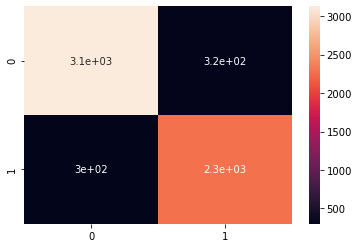

In [80]:
sn.heatmap(confussion, annot=True)


In [81]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rm=RandomForestClassifier(n_estimators=1000)

In [84]:
rm.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [86]:
predict_rm=rm.predict(X_test)

In [87]:
acc=accuracy_score(y_test,predict_rm)
acc

0.9315658657829329

In [88]:
confussion_rm=confusion_matrix(y_test,predict_rm)

<AxesSubplot:>

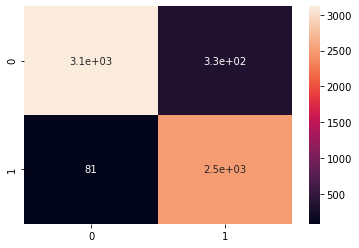

In [89]:
sn.heatmap(confussion_rm, annot=True)
